<a href="https://colab.research.google.com/github/hirajya/CCADMACL_EXERCISES_COM222-/blob/main/Exercise4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 4

## Import the libraries

In [223]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA


## Load the data

In [246]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [224]:
X = pd.read_csv('creditcard.csv')

# Dropping the CUST_ID column from the data
X = X.drop('CUST_ID', axis = 1)

# Handling the missing values
X.fillna(method ='ffill', inplace = True)

print(X.head())


       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                

<ipython-input-224-40fe016c1c05>:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X.fillna(method ='ffill', inplace = True)


## Pre-process the data

In [225]:
# Scaling the data to bring all the attributes to a comparable level
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Normalizing the data so that
# the data approximately follows a Gaussian distribution
X_normalized = normalize(X_scaled)

# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)


## Reduce the dimensionality of the data using PCA

In [226]:
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']
print(X_principal.head())


         P1        P2
0 -0.489949 -0.679976
1 -0.519099  0.544827
2  0.330633  0.268879
3 -0.481656 -0.097611
4 -0.563512 -0.482506


## Train a DBSCAN model using default values

In [227]:
# Numpy array of all the cluster labels assigned to each data point
db_default = DBSCAN().fit(X_principal)
labels = db_default.labels_

## Plot the clustered data

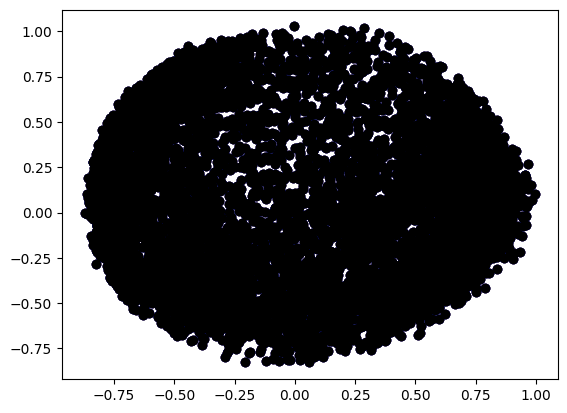

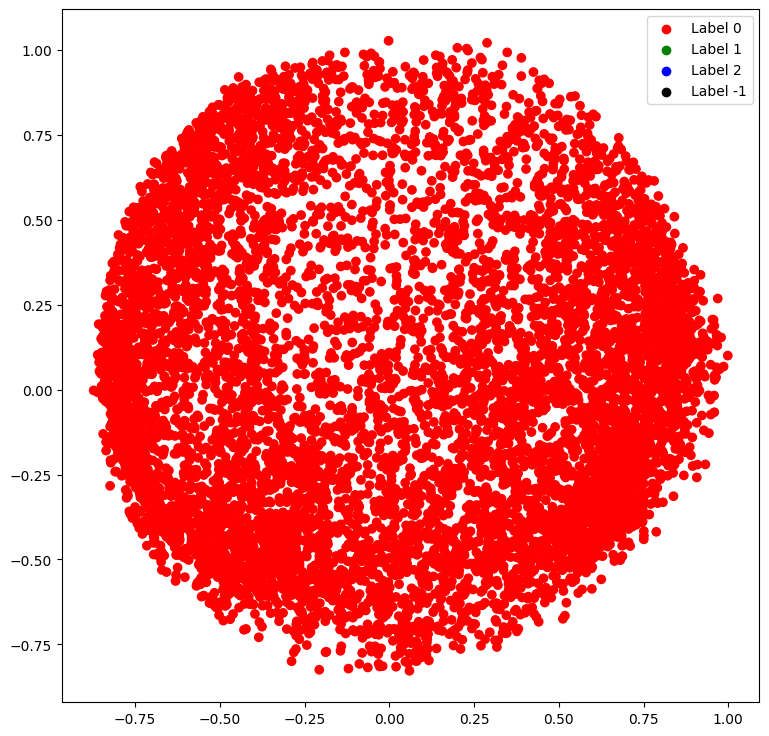

In [228]:
# Building the label to colour mapping
colours = {}
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'

# Building the colour vector for each data point
cvec = [colours[label] for label in labels]

# For the construction of the legend of the plot
r = plt.scatter(X_principal['P1'], X_principal['P2'], color ='r');
g = plt.scatter(X_principal['P1'], X_principal['P2'], color ='g');
b = plt.scatter(X_principal['P1'], X_principal['P2'], color ='b');
k = plt.scatter(X_principal['P1'], X_principal['P2'], color ='k');

# Plotting P1 on the X-Axis and P2 on the Y-Axis
# according to the colour vector defined
plt.figure(figsize =(9, 9))
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec)

# Building the legend
plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1'))

plt.show()


1. Train a DBSCAN model

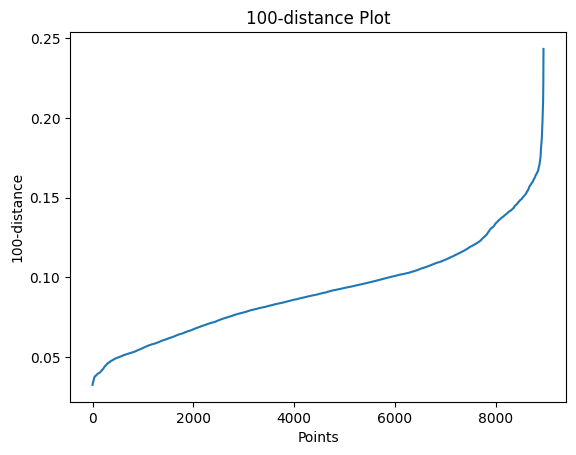

In [234]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Compute the k-distance for the dataset
k = 100  # Same as min_samples
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(X_principal)
distances, indices = neighbors_fit.kneighbors(X_principal)

# Sort distances and plot
distances = np.sort(distances[:, k-1], axis=0)
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel(f"{k}-distance")
plt.title(f"{k}-distance Plot")
plt.show()


In [308]:
# Training the DBSCAN model
db = DBSCAN(eps=0.137, min_samples=205).fit(X_principal)
labels = db.labels_


2. Plot the clustered data

<ipython-input-309-d56df5f8aee2>:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_principal.loc[mask, 'P1'], X_principal.loc[mask, 'P2'], c=color, label=f'Label {label}')


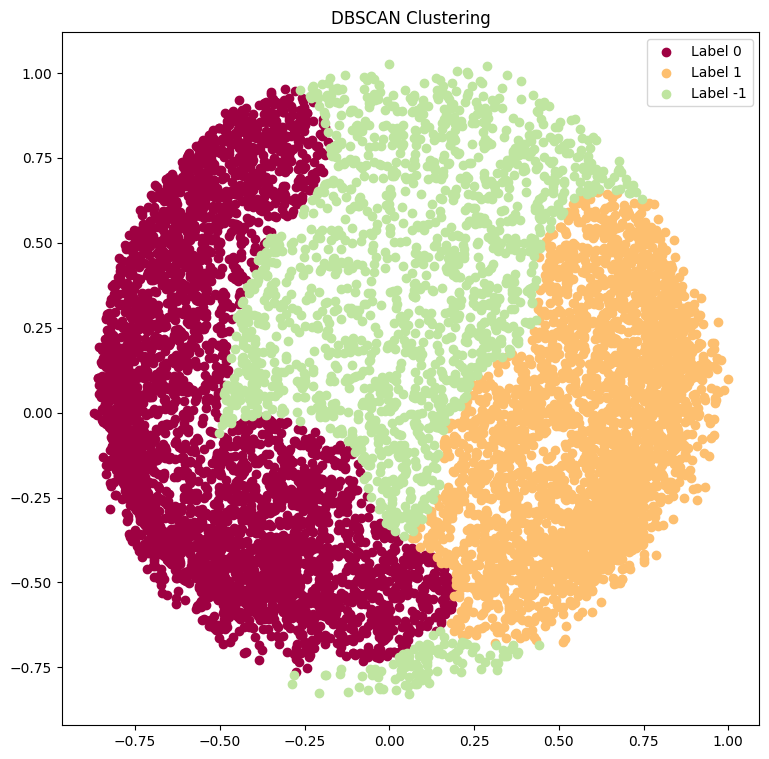

In [309]:
# Building the label to colour mapping
colours = {}
unique_labels = set(labels)
for i, label in enumerate(unique_labels):
    colours[label] = plt.cm.Spectral(float(i) / len(unique_labels))

# Building the colour vector for each data point
cvec = [colours[label] for label in labels]

# Plotting the clusters
plt.figure(figsize=(9, 9))
for label, color in colours.items():
    mask = labels == label
    plt.scatter(X_principal.loc[mask, 'P1'], X_principal.loc[mask, 'P2'], c=color, label=f'Label {label}')

plt.legend()
plt.title("DBSCAN Clustering")
plt.show()


3. Print the number of clusters

In [310]:
# Number of clusters (excluding noise)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Number of clusters: {n_clusters}")


Number of clusters: 2


4. Print the number of noisy data

In [311]:
# Number of noisy data points
n_noise = list(labels).count(-1)
print(f"Number of noisy data points: {n_noise}")


Number of noisy data points: 1628


5. Print the silhouette score

In [312]:
from sklearn.metrics import silhouette_score

# Check if the number of clusters is greater than 1
if n_clusters > 1:
    silhouette = silhouette_score(X_principal, labels)
    print(f"Silhouette Score: {silhouette}")
else:
    print("Silhouette Score cannot be computed with less than 2 clusters.")


Silhouette Score: 0.32197092458303783
